# Import packages and datasets

In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Set default Seaborn style
sns.set()

# Importing course datasets as DataFrames
belmont = pd.read_csv('../datasets/raw/belmont.csv')
michelson = pd.read_csv('../datasets/raw/michelson_speed_of_light.csv', index_col=0)
all_states = pd.read_csv('../datasets/raw/2008_all_states.csv')
swing_states = pd.read_csv('../datasets/raw/2008_swing_states.csv')

belmont.head() # Display the first five rows

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


# Graphical Exploratory Data Analysis

## manage the dataset

In [2]:
# load data from sklearn
from sklearn.datasets import load_iris

iris = load_iris()

# convert the dataset into pandas dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# create categorical variable to include species
df_iris['species'] = ''
df_iris.loc[df_iris['target']==0, 'species'] = 'setosa'
df_iris.loc[df_iris['target']==1, 'species'] = 'versicolor'
df_iris.loc[df_iris['target']==2, 'species'] = 'virginica'

is_null = df_iris['species'] == ''
print("null value: %d"%np.sum(is_null))
#print("null value: %d"%np.sum(df_iris['species'].isnull()))
df_iris.head()

null value: 0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [4]:
# select versicolor target

is_setosa     = df_iris['target'] == 0
is_versicolor = df_iris['target'] == 1
is_virginica  = df_iris['target'] == 2

df_setosa     = df_iris[is_setosa].copy()
df_versicolor = df_iris[is_versicolor].copy()
df_virginica  = df_iris[is_virginica].copy()

# check the data
df_versicolor.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
50,7.0,3.2,4.7,1.4,1.0,versicolor
51,6.4,3.2,4.5,1.5,1.0,versicolor
52,6.9,3.1,4.9,1.5,1.0,versicolor
53,5.5,2.3,4.0,1.3,1.0,versicolor
54,6.5,2.8,4.6,1.5,1.0,versicolor


In [5]:
# collect petal length data

setosa_petal_length     = df_setosa['petal length (cm)']
versicolor_petal_length = df_versicolor['petal length (cm)']
virginica_petal_length  = df_virginica['petal length (cm)']

setosa_petal_width     = df_setosa['petal width (cm)']
versicolor_petal_width = df_versicolor['petal width (cm)']
virginica_petal_width  = df_virginica['petal width (cm)']

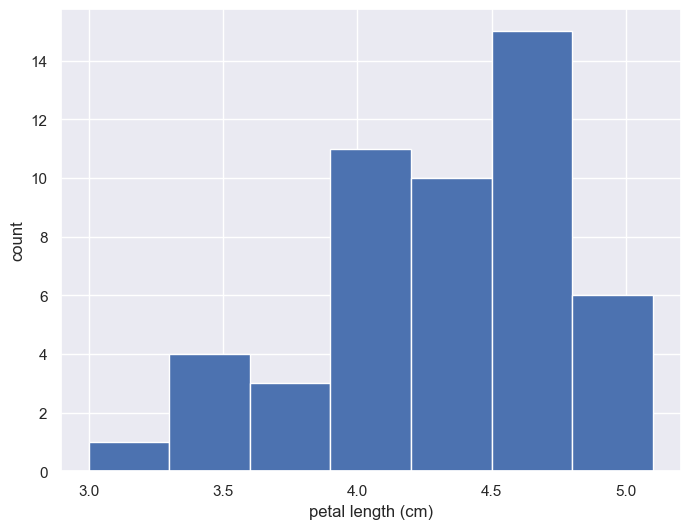

In [6]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = int(np.sqrt(n_data))

fig, ax = plt.subplots()

# Plot histogram of versicolor petal lengths
ax.hist(versicolor_petal_length, bins=n_bins)

ax.set_ylabel('count')
ax.set_xlabel('petal length (cm)');

## Bee Swarm plot

Text(0, 0.5, 'petal length (cm)')

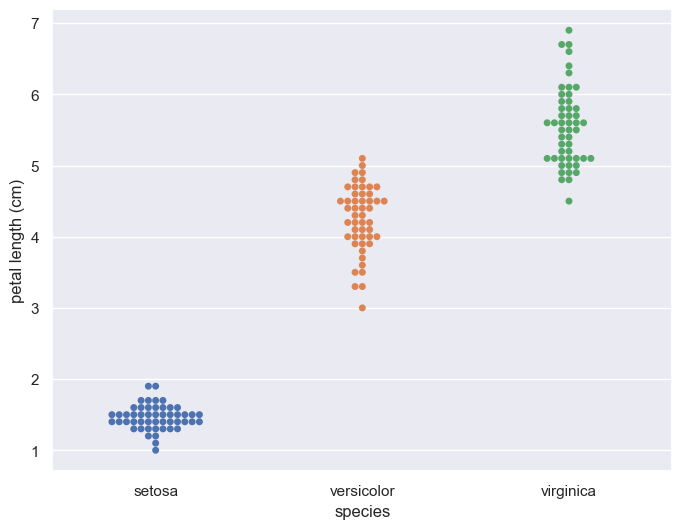

In [7]:
fig, ax = plt.subplots()

sns.swarmplot(x='species', y='petal length (cm)', data=df_iris, ax=ax)

ax.set_xlabel('species')
ax.set_ylabel('petal length (cm)')

## Empirical cumulative distribution function (ECDF) 

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

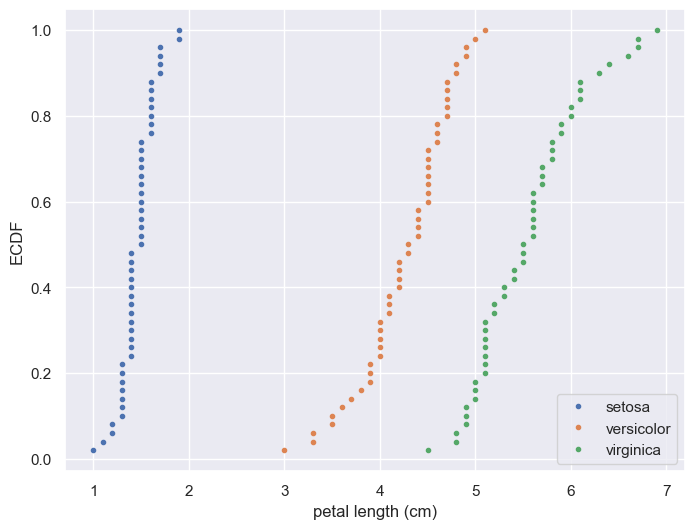

In [9]:
# Compute ECDFs
x_set, y_set   = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

fig, ax = plt.subplots()

# Plot all ECDFs on the same plot
ax.plot(x_set, y_set, marker='.', linestyle='none')
ax.plot(x_vers, y_vers, marker='.', linestyle='none')
ax.plot(x_virg, y_virg, marker='.', linestyle='none')

ax.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('ECDF');

# Quantitative Exploratory Data Analysis

In [10]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


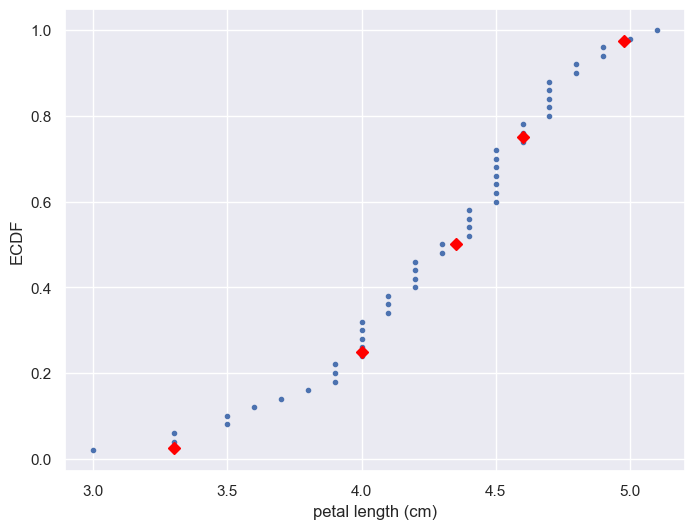

In [11]:
''' plot the ECDF '''

fig, ax = plt.subplots()

# Plot the ECDF
ax.plot(x_vers, y_vers, '.')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('ECDF')

# Overlay percentiles as red diamonds.
ax.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none');

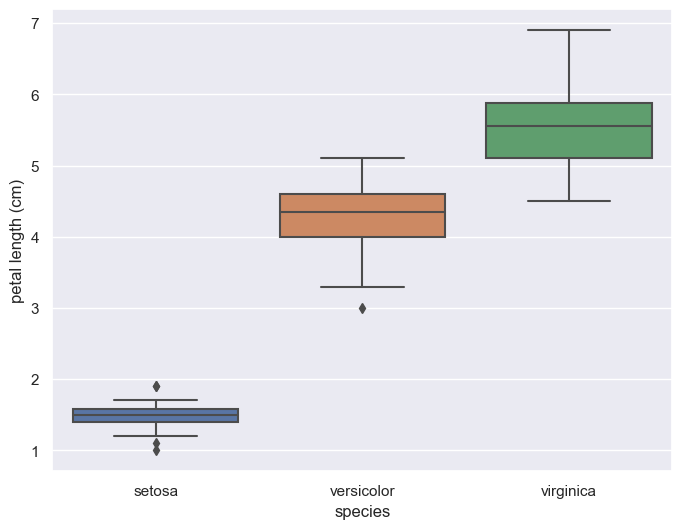

In [12]:
''' Box plot '''

fig, ax = plt.subplots()

# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=df_iris, ax=ax)

ax.set_xlabel('species')
ax.set_ylabel('petal length (cm)');

### Variance and Covariance

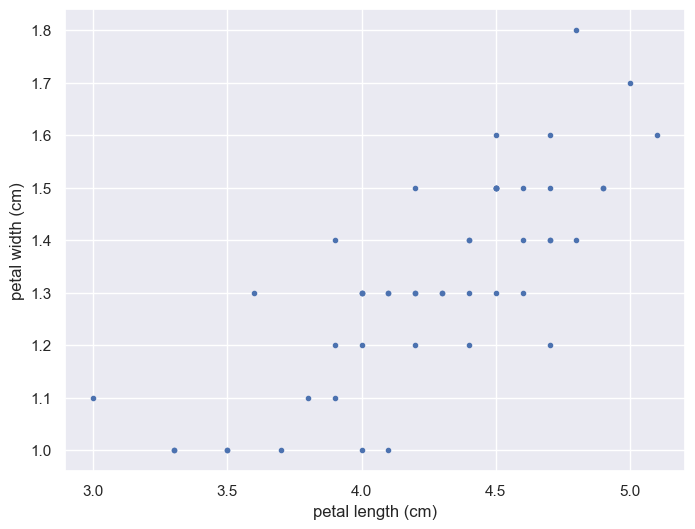

In [13]:
''' Make a scatter plot '''

fig, ax = plt.subplots()
ax.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)');


The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [14]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In [15]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# Thinking Probabilistically -- Discrete Variables

a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability  of landing heads (success) and probability  of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials,

In [16]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_nb = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_nb < p:
            n_success += 1

    return n_success

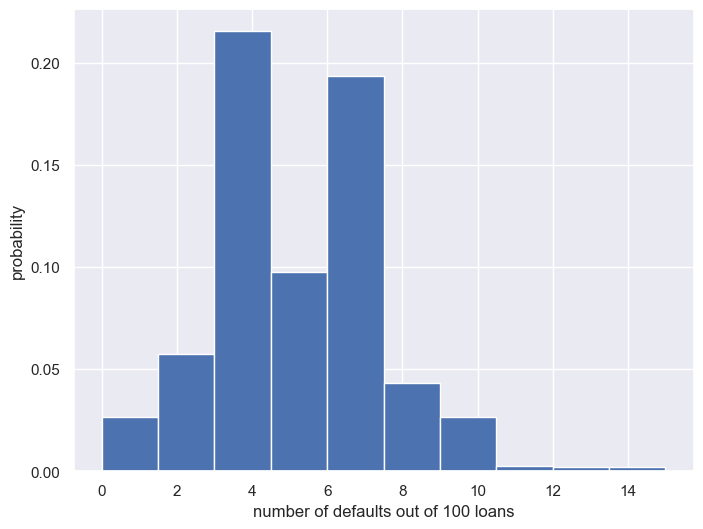

In [17]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

fig, ax = plt.subplots()

# Plot the histogram with default number of bins; label your axes
ax.hist(n_defaults, density=True)  # keyword 'normed' is deprecated in histogram
ax.set_xlabel('number of defaults out of 100 loans')
ax.set_ylabel('probability');

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

Probability of losing money = 0.022


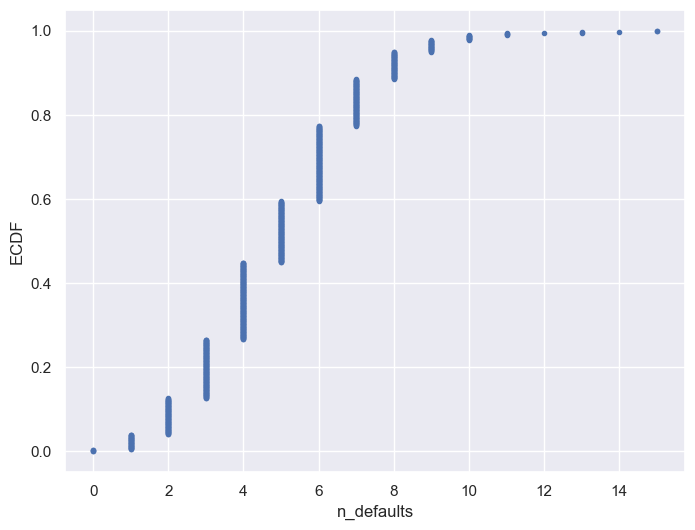

In [18]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

fig, ax = plt.subplots()

# Plot the ECDF with labeled axes
ax.plot(x, y, marker='.', linestyle='none')
ax.set_xlabel('n_defaults')
ax.set_ylabel('ECDF')

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum( n_defaults >= 10 )

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

## Binomial distribution

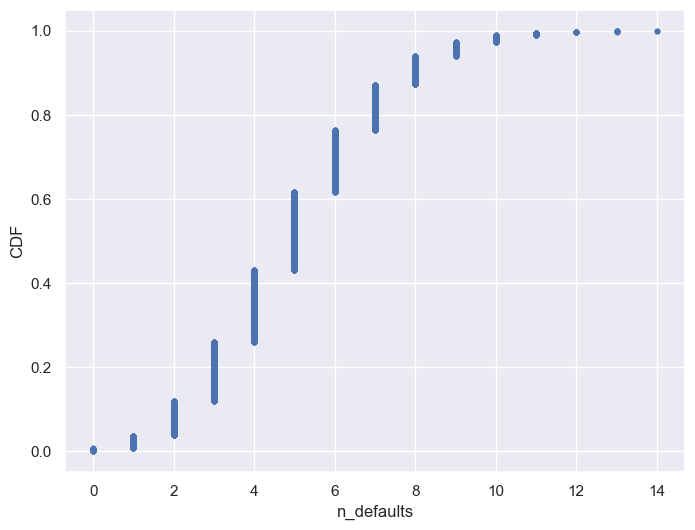

In [19]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

fig, ax = plt.subplots()

# Plot the CDF with axis labels
ax.plot(x, y, marker='.', linestyle='none')
ax.set_xlabel('n_defaults')
ax.set_ylabel('CDF');

The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5.

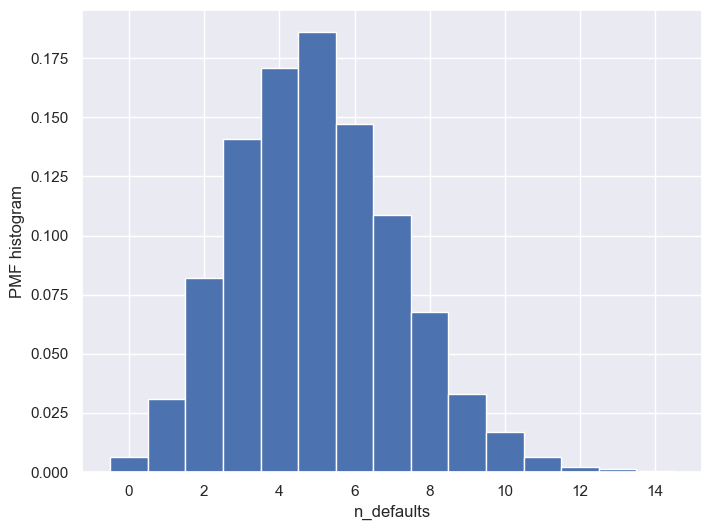

In [20]:
''' Plotting the Binomial PMF '''

# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 2) - 0.5

fig, ax = plt.subplots()

# Generate histogram
ax.hist(n_defaults, density=True, bins=bins)
ax.set_xlabel('n_defaults')
ax.set_ylabel('PMF histogram');

## Poisson Distribution

- a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes.

In [21]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10_000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10_000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [22]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


# Thinking Probabilistically -- Continuous Variables

## Normal probability density distribution (PDF)

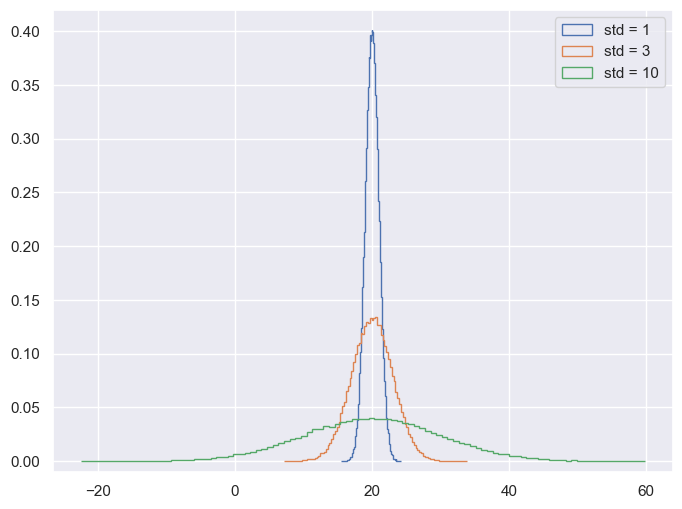

In [23]:
'''Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10 '''

samples_std1  = np.random.normal(20, 1, size=100_000)
samples_std3  = np.random.normal(20, 3, size=100_000)
samples_std10 = np.random.normal(20, 10, size=100_000)

fig, ax = plt.subplots()

# Make histograms
ax.hist(samples_std1, bins=100, density=True, histtype='step')
ax.hist(samples_std3, bins=100, density=True, histtype='step')
ax.hist(samples_std10,bins=100, density=True, histtype='step')

ax.legend(('std = 1', 'std = 3', 'std = 10'))
ax.set_ylim(-0.01, 0.42);

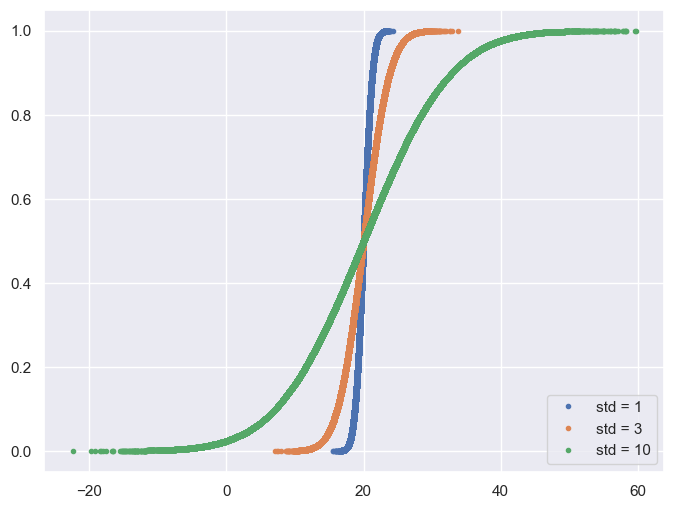

In [24]:
''' Normal CDF '''

# Generate CDFs
x_std1,  y_std1  = ecdf(samples_std1)
x_std3,  y_std3  = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

fig, ax = plt.subplots()

# Plot CDFs
ax.plot(x_std1,  y_std1, marker='.', linestyle='none')
ax.plot(x_std3,  y_std3, marker='.', linestyle='none')
ax.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
ax.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right');

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [25]:
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [26]:
''' formatted time to seconds '''

winners_sec = belmont['Time'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))

belmont_times = winners_sec.values

print(belmont_times)

[148.51 146.65 148.52 150.7  150.42 150.88 151.57 147.54 149.65 148.74
 147.86 148.75 147.5  148.26 149.71 146.56 151.19 147.88 149.16 148.82
 148.96 152.02 146.82 149.97 146.13 148.1  147.2  146.   146.4  148.2
 149.8  147.   147.2  147.8  148.2  149.   149.8  148.6  146.8  149.6
 149.   148.2  149.2  144.   148.   150.4  154.   148.8  147.2  148.8
 149.6  148.4  148.4  150.2  148.8  149.2  149.2  148.4  150.2  146.6
 149.8  149.   150.8  148.6  150.2  149.   148.6  150.2  148.2  149.4
 150.8  150.2  152.2  148.2  149.2  151.   149.6  149.6  149.4  148.6
 150.   150.6  149.2  152.6  152.8  149.6  151.6  152.8  153.2  152.4
 152.2 ]


In [27]:
''' eliminate outliers '''

print('original size: %d'%len(belmont_times))
belmont_no_outliers = belmont_times[belmont_times < np.max(belmont_times)]
belmont_no_outliers = belmont_times[belmont_times > np.min(belmont_times)]
print('size after elimination of outliers: %d'%len(belmont_no_outliers))

original size: 91
size after elimination of outliers: 90


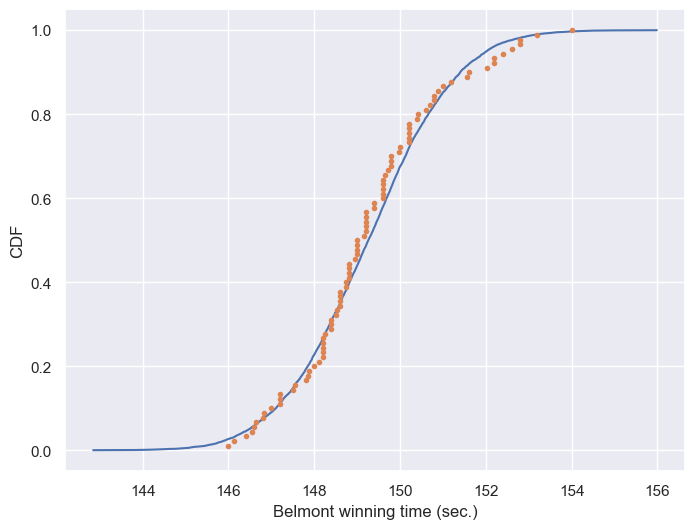

In [28]:
''' comparison of ECDF between normal distribution and data '''

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10_000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

fig, ax = plt.subplots()

# Plot the CDFs and show the plot
ax.plot(x_theor, y_theor)
ax.plot(x, y, marker='.', linestyle='none')
ax.set_xlabel('Belmont winning time (sec.)')
ax.set_ylabel('CDF');

What are the chances of a horse matching or beating Secretariat's record?

In [29]:
belmont[belmont['Winner'] == 'Secretariat']

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
43,1973,Secretariat,Ron Turcotte,Lucien Laurin,Meadow Stable,2:24.00,Belmont,1.5


In [30]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1_000_000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / 1_000_000

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000855


## Exponential Distribution

we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle, when a batter gets all four kinds of hits in a single game, is another rare baseball event. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

In [31]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

Text(0, 0.5, 'histogram')

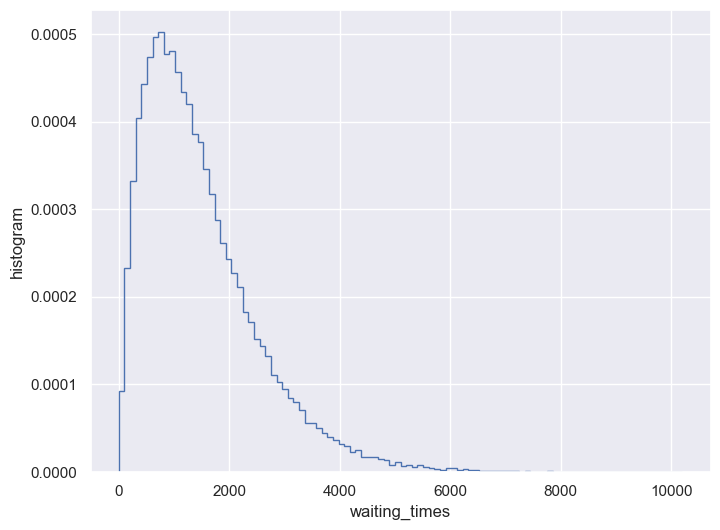

In [32]:
''' Draw samples of waiting times: waiting_times '''

waiting_times = successive_poisson(764, 715, size=100_000)

fig, ax = plt.subplots()

# Make the histogram
ax.hist(waiting_times,bins=100, density=True, histtype='step')
ax.set_xlabel('waiting_times')
ax.set_ylabel('histogram')